#1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Extract Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIB6_Course-Net Indonesia/Final Project/Credit Card Churn - Dataset.csv')
df

,client_id,label,usia,gender,jumlah_tanggungan,pendidikan,status_nikah,penghasilan_tahunan,tipe_kartu_kredit,lama_nasabah,...,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
0,719455083,0,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,0,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,0,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,0,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,0,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,708504783,0,47,M,3,Uneducated,Unknown,$40K - $60K,Blue,36,...,3,3,10960.0,1333,9627.0,0.678,3480,62,0.632,0.122
4996,709249083,1,40,M,2,Unknown,Single,$60K - $80K,Blue,20,...,2,4,4283.0,0,4283.0,0.878,8672,64,1.207,0.000
4997,713144208,1,51,F,0,High School,Married,Unknown,Blue,42,...,4,4,9989.0,568,9421.0,0.520,2053,49,0.485,0.057
4998,710375283,0,26,F,0,Uneducated,Single,$40K - $60K,Blue,18,...,3,2,2033.0,1471,562.0,0.672,2236,55,0.410,0.724


In [ ]:
df.columns

Index(['client_id', 'label', 'usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian'],
      dtype='object')

#3. Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   client_id                     5000 non-null   int64  
 1   label                         5000 non-null   int64  
 2   usia                          5000 non-null   int64  
 3   gender                        5000 non-null   object 
 4   jumlah_tanggungan             5000 non-null   int64  
 5   pendidikan                    5000 non-null   object 
 6   status_nikah                  5000 non-null   object 
 7   penghasilan_tahunan           5000 non-null   object 
 8   tipe_kartu_kredit             5000 non-null   object 
 9   lama_nasabah                  5000 non-null   int64  
 10  jumlah_produk                 5000 non-null   int64  
 11  bulan_nonactive               5000 non-null   int64  
 12  jumlah_kontak                 5000 non-null   int64  
 13  tot

In [ ]:
# cek data duplikat pada kolom client_id
df['client_id'].duplicated().sum()

0

##3.1. Missing Values

In [ ]:
df.isna().sum()

client_id                       0
label                           0
usia                            0
gender                          0
jumlah_tanggungan               0
pendidikan                      0
status_nikah                    0
penghasilan_tahunan             0
tipe_kartu_kredit               0
lama_nasabah                    0
jumlah_produk                   0
bulan_nonactive                 0
jumlah_kontak                   0
total_limit_kredit              0
total_limit_kredit_dipakai      0
sisa_limit_kredit               0
rasio_transaksi_Q4_Q1           0
total_transaksi                 0
jumlah_transaksi                0
rasio_jumlah_transaksi_Q4_Q1    0
rasio_pemakaian                 0
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for i in categorical_columns:
    print(df[i].value_counts())
    print("\n===========\n")

gender
F    2675
M    2325
Name: count, dtype: int64


pendidikan
Graduate         1508
High School       998
Uneducated        755
Unknown           743
College           512
Post-Graduate     259
Doctorate         225
Name: count, dtype: int64


status_nikah
Married     2300
Single      1956
Unknown      390
Divorced     354
Name: count, dtype: int64


penghasilan_tahunan
Less than $40K    1763
$40K - $60K        890
$80K - $120K       760
$60K - $80K        666
Unknown            561
$120K +            360
Name: count, dtype: int64


tipe_kartu_kredit
Blue        4652
Silver       278
Gold          59
Platinum      11
Name: count, dtype: int64




In [ ]:
# Mengganti nilai 'Divorced' menjadi 'Single' -> karena divorced == single
df['status_nikah'] = df['status_nikah'].replace('Divorced', 'Single')

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for i in categorical_columns:
    print(df[i].value_counts())
    print("\n===========\n")

gender
F    2675
M    2325
Name: count, dtype: int64


pendidikan
Graduate         1508
High School       998
Uneducated        755
Unknown           743
College           512
Post-Graduate     259
Doctorate         225
Name: count, dtype: int64


status_nikah
Single     2310
Married    2300
Unknown     390
Name: count, dtype: int64


penghasilan_tahunan
Less than $40K    1763
$40K - $60K        890
$80K - $120K       760
$60K - $80K        666
Unknown            561
$120K +            360
Name: count, dtype: int64


tipe_kartu_kredit
Blue        4652
Silver       278
Gold          59
Platinum      11
Name: count, dtype: int64




In [ ]:
# Mengganti nilai 'Unknown' dengan NaN di agar bisa dilihat dengan fungsi isna() dan bisa dilakukan imputasi
df.replace('Unknown', np.nan, inplace=True)

In [ ]:
df.isna().sum()

client_id                         0
label                             0
usia                              0
gender                            0
jumlah_tanggungan                 0
pendidikan                      743
status_nikah                    390
penghasilan_tahunan             561
tipe_kartu_kredit                 0
lama_nasabah                      0
jumlah_produk                     0
bulan_nonactive                   0
jumlah_kontak                     0
total_limit_kredit                0
total_limit_kredit_dipakai        0
sisa_limit_kredit                 0
rasio_transaksi_Q4_Q1             0
total_transaksi                   0
jumlah_transaksi                  0
rasio_jumlah_transaksi_Q4_Q1      0
rasio_pemakaian                   0
dtype: int64

In [ ]:
df.describe()

,client_id,label,usia,jumlah_tanggungan,lama_nasabah,jumlah_produk,bulan_nonactive,jumlah_kontak,total_limit_kredit,total_limit_kredit_dipakai,sisa_limit_kredit,rasio_transaksi_Q4_Q1,total_transaksi,jumlah_transaksi,rasio_jumlah_transaksi_Q4_Q1,rasio_pemakaian
count,5.000000e+03,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.390590e+08,0.160000,46.38880,2.36100,35.913000,3.83380,2.335400,2.464800,8637.409280,1171.823200,7465.586080,0.758146,4347.268800,64.434600,0.711494,0.277980
std,3.679612e+07,0.366643,8.03182,1.31203,7.922751,1.55263,1.004146,1.101546,9112.079042,814.875378,9116.649832,0.220429,3343.231144,23.164582,0.241518,0.277661
min,7.080846e+08,0.000000,26.00000,0.00000,13.000000,1.00000,0.000000,0.000000,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130287e+08,0.000000,41.00000,1.00000,31.000000,3.00000,2.000000,2.000000,2571.750000,475.500000,1297.750000,0.629000,2132.750000,45.000000,0.578000,0.026000
50%,7.179772e+08,0.000000,46.00000,2.00000,36.000000,4.00000,2.000000,2.000000,4566.500000,1279.000000,3423.500000,0.735000,3889.000000,67.000000,0.700000,0.181000
75%,7.728630e+08,0.000000,52.00000,3.00000,40.000000,5.00000,3.000000,3.000000,11003.000000,1792.000000,9836.250000,0.859000,4747.000000,80.000000,0.816000,0.511000
max,8.282989e+08,1.000000,73.00000,5.00000,56.000000,6.00000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,131.000000,3.571000,0.994000


##3.2. Univariate Analysis

In [ ]:
# Definisi fitur yang ingin dianalisis
univariate_features = ['label', 'usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

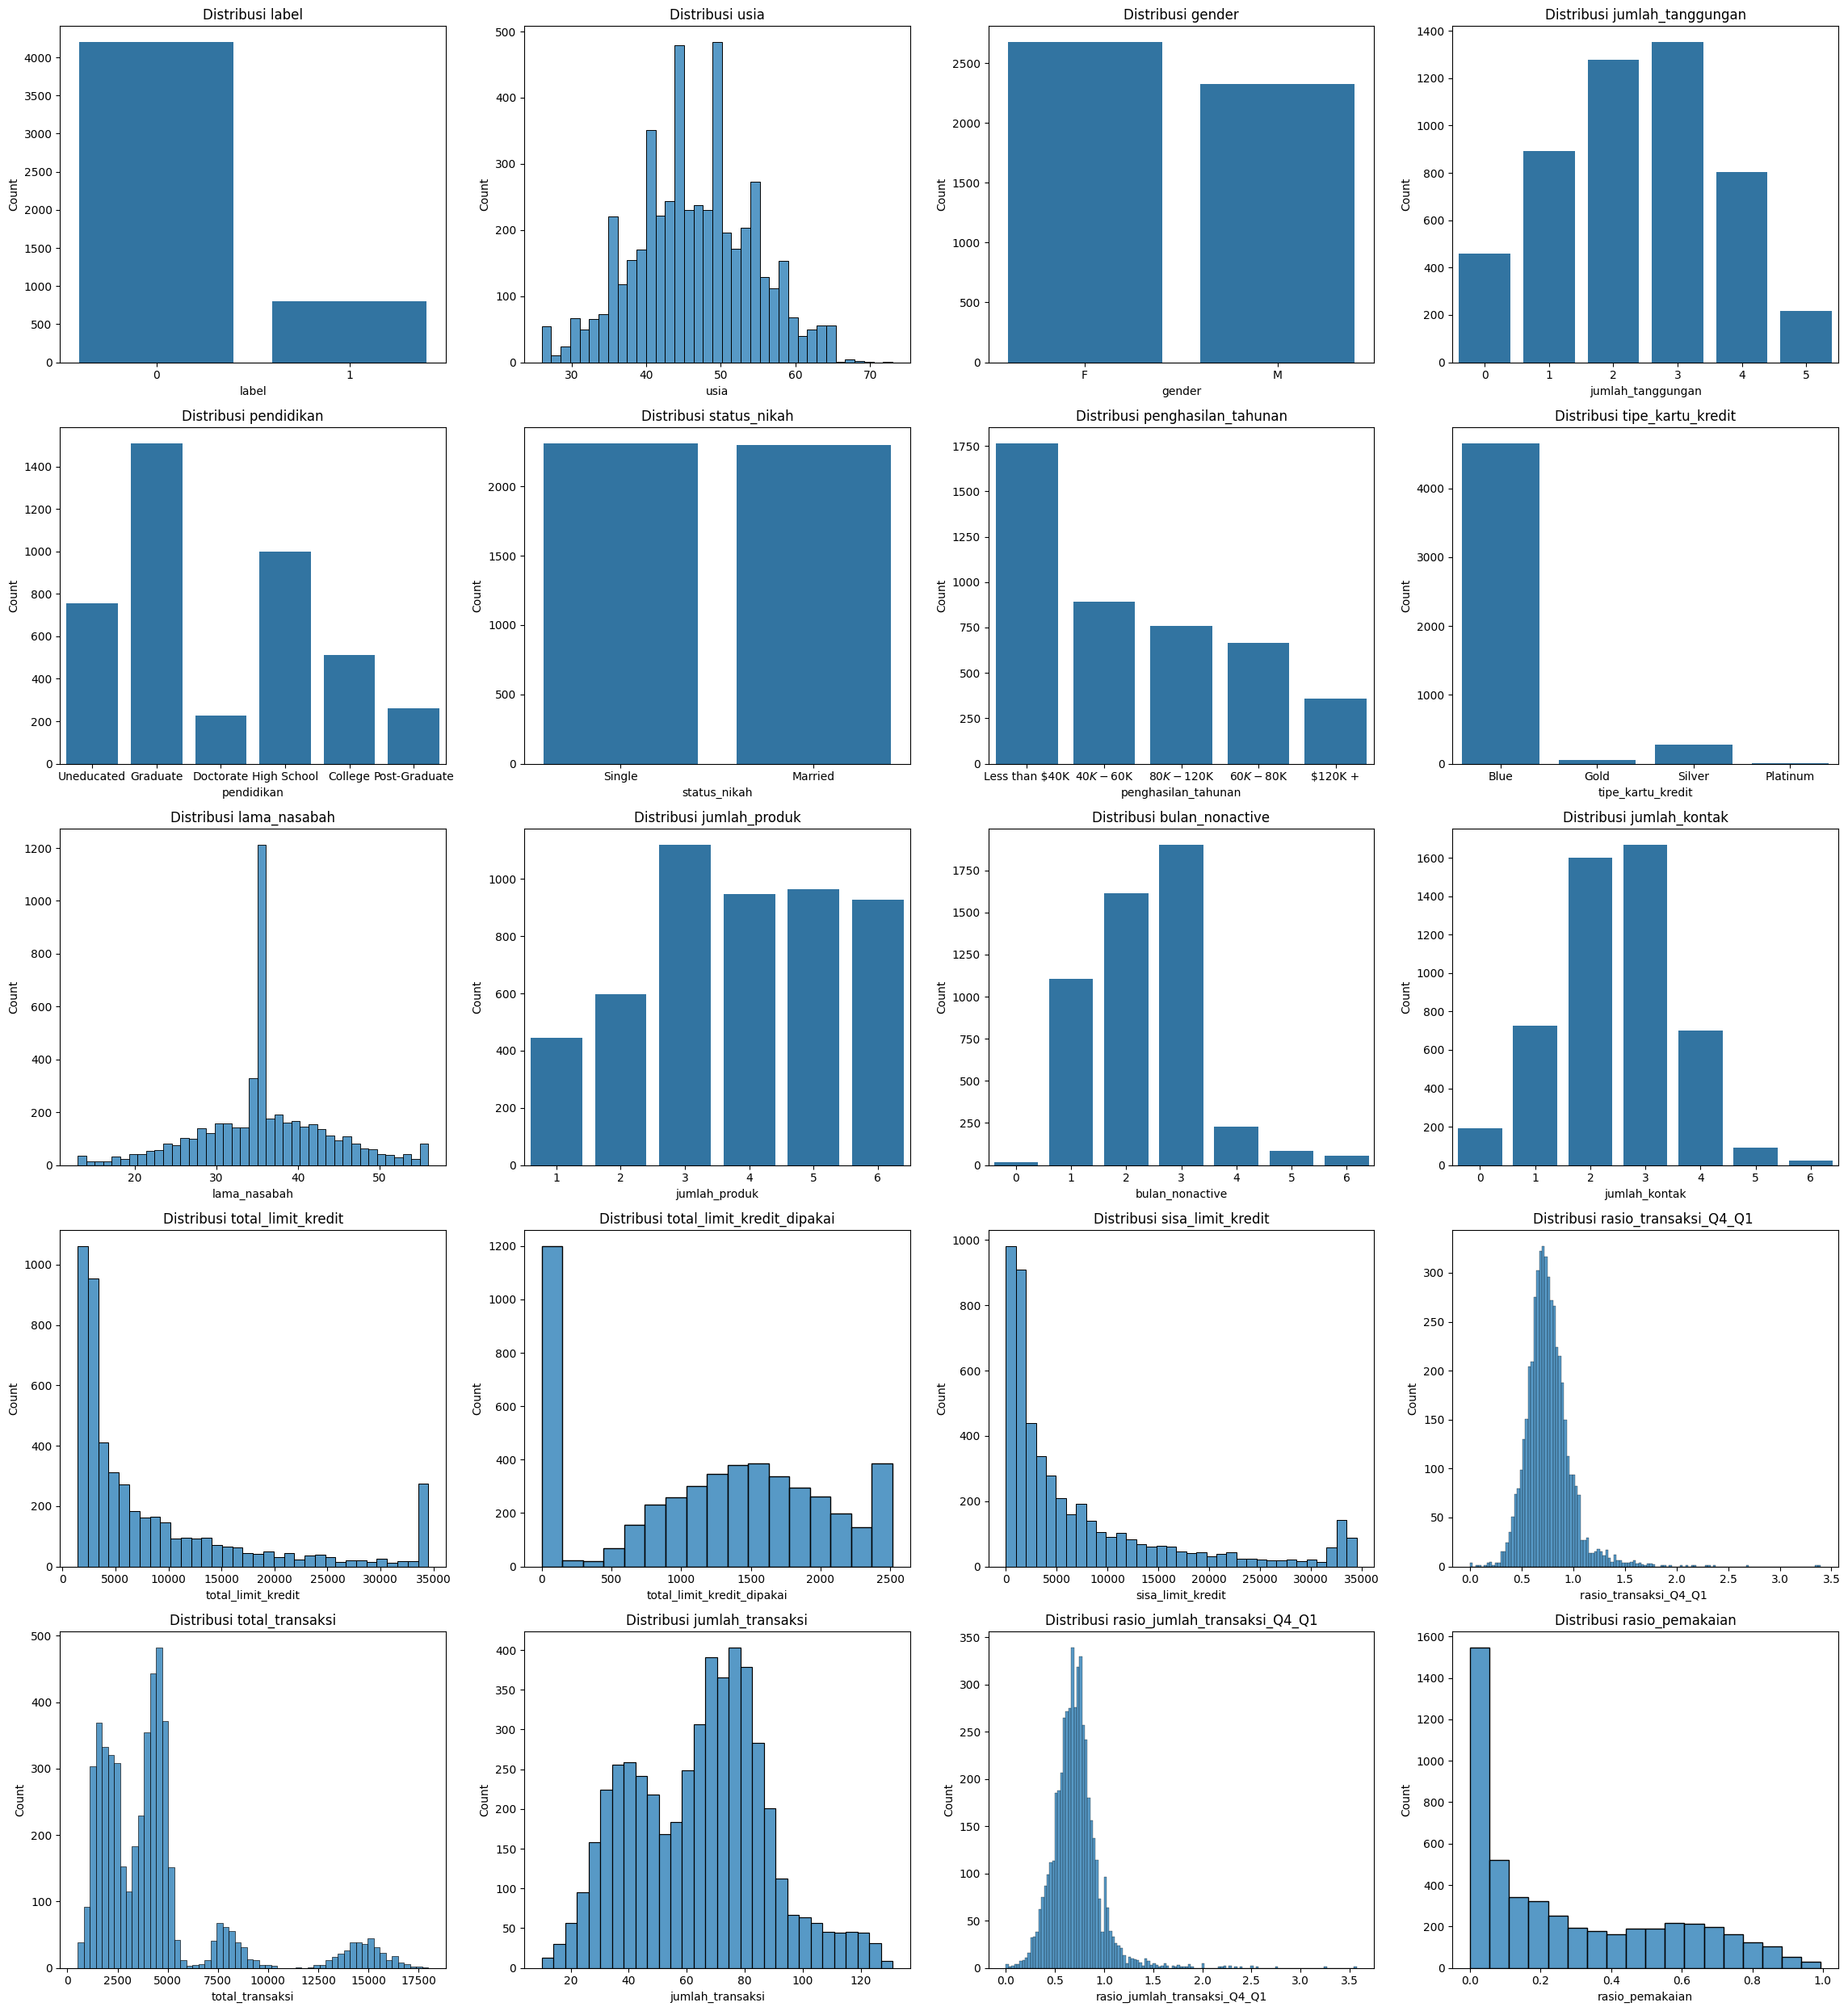

In [ ]:
import math
# Iterasi untuk melakukan analisis univariate dalam tata letak 4 kolom
num_cols = 4
num_univariate_plots = len(univariate_features)

plt.figure(figsize=(23, math.ceil(num_univariate_plots / num_cols) * 5))  # Mengatur ukuran gambar keseluruhan

# Analisis Univariate
for i, feature in enumerate(univariate_features):
    plt.subplot(math.ceil(num_univariate_plots / num_cols), num_cols, i + 1)
    if df[feature].dtype == 'object' or len(df[feature].unique()) < 20:
        sns.countplot(data=df, x=feature)
    else:
        sns.histplot(data=df, x=feature)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##3.3. Bivariate Analysis

In [ ]:
# Definisi fitur yang ingin dianalisis
bivariate_features = ['usia', 'gender', 'jumlah_tanggungan',
       'pendidikan', 'status_nikah', 'penghasilan_tahunan',
       'tipe_kartu_kredit', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

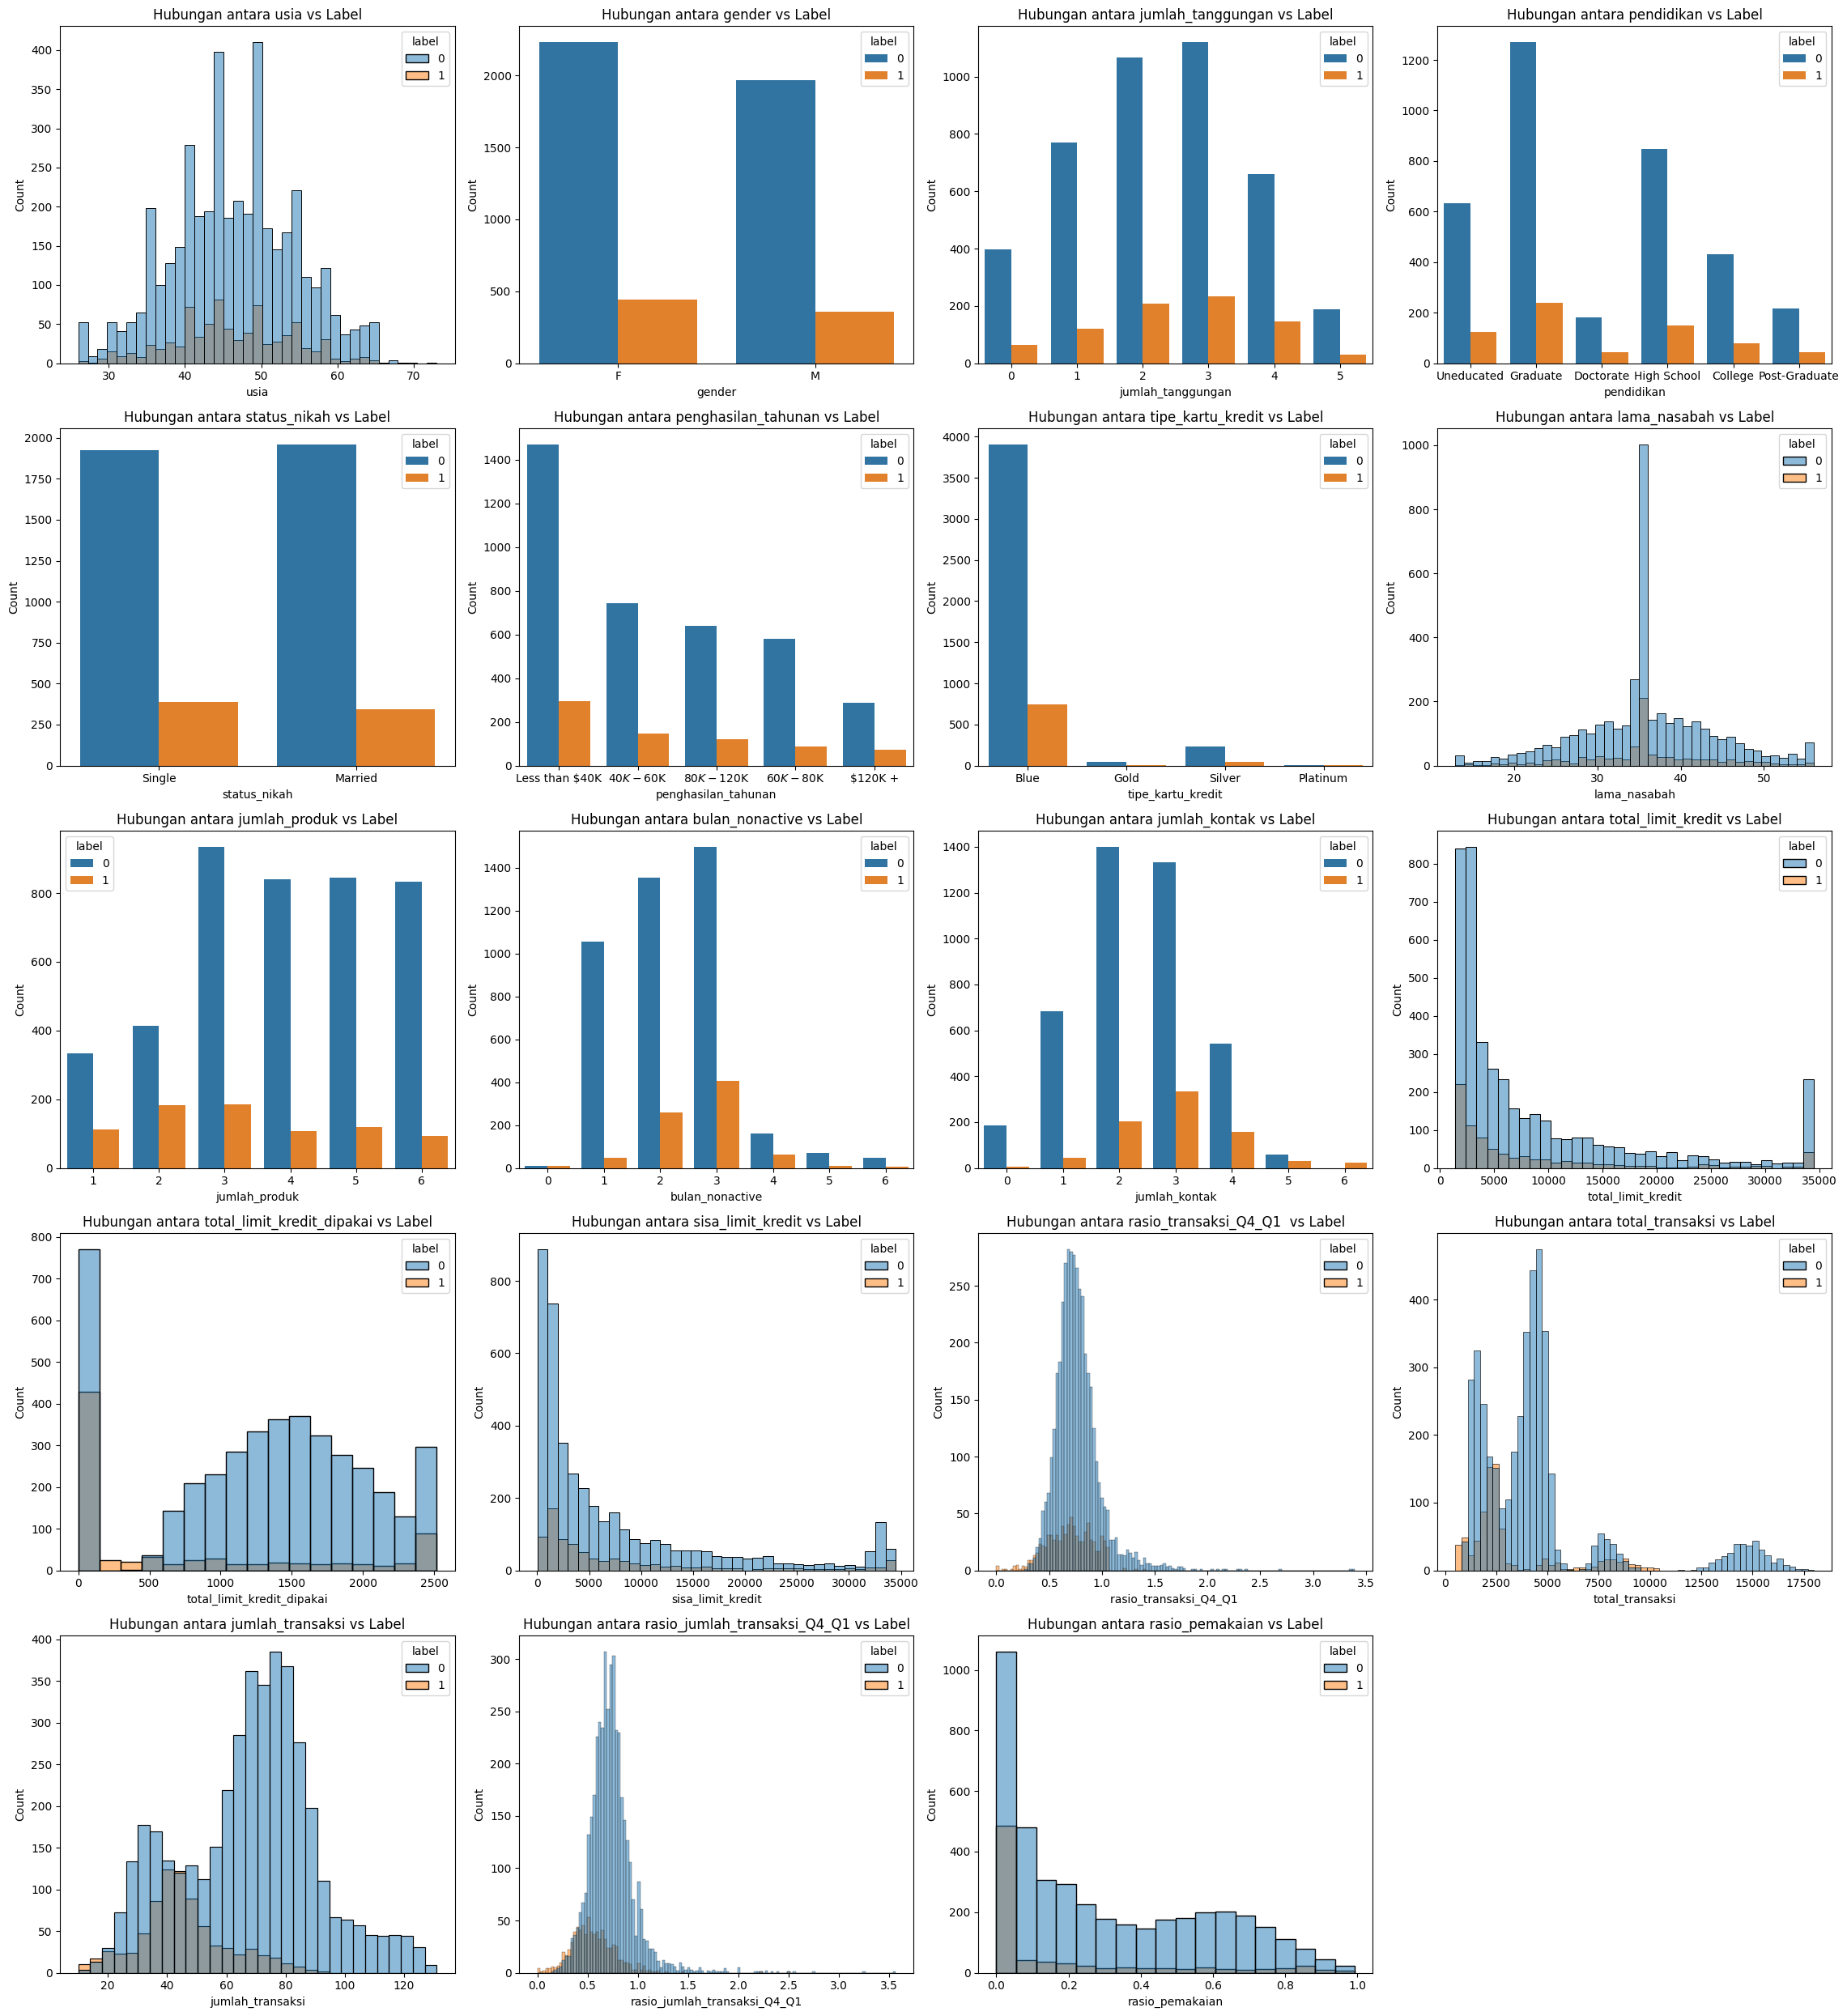

In [ ]:
# Iterasi untuk melakukan analisis univariate dalam tata letak 4 kolom
num_cols = 4
num_bivariate_plots = len(bivariate_features)

plt.figure(figsize=(23, math.ceil(num_bivariate_plots / num_cols) * 5))  # Mengatur ukuran gambar keseluruhan

# Analisis Univariate
for i, feature in enumerate(bivariate_features):
    plt.subplot(math.ceil(num_bivariate_plots / num_cols), num_cols, i + 1)
    if df[feature].dtype == 'object' or len(df[feature].unique()) < 20:
        sns.countplot(data=df, x=feature, hue='label')
    else:
        sns.histplot(data=df, x=feature, hue='label')
    plt.title(f'Hubungan antara {feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

##3.4. Correlation

In [ ]:
# Hitung matriks korelasi antara fitur-fitur dan target
correlation_matrix = df.corr(numeric_only=True)

# Tampilkan korelasi dengan target (misalnya 'target')
target_correlation = correlation_matrix['label'].sort_values(ascending=False)
print("Correlation with target:")
print(target_correlation)

# Pilih fitur-fitur dengan korelasi yang tinggi
threshold = 0.5  # Ambang korelasi yang diinginkan
selected_features = target_correlation[target_correlation > threshold].index.tolist()

print("Selected Features:", selected_features)

Correlation with target:
label                           1.000000
jumlah_kontak                   0.204144
bulan_nonactive                 0.140553
jumlah_tanggungan               0.032935
lama_nasabah                    0.004449
sisa_limit_kredit               0.003345
usia                           -0.007271
total_limit_kredit             -0.020286
client_id                      -0.039107
rasio_transaksi_Q4_Q1          -0.127198
total_transaksi                -0.154149
jumlah_produk                  -0.158146
rasio_pemakaian                -0.175944
total_limit_kredit_dipakai     -0.264261
rasio_jumlah_transaksi_Q4_Q1   -0.280115
jumlah_transaksi               -0.355787
Name: label, dtype: float64
Selected Features: ['label']


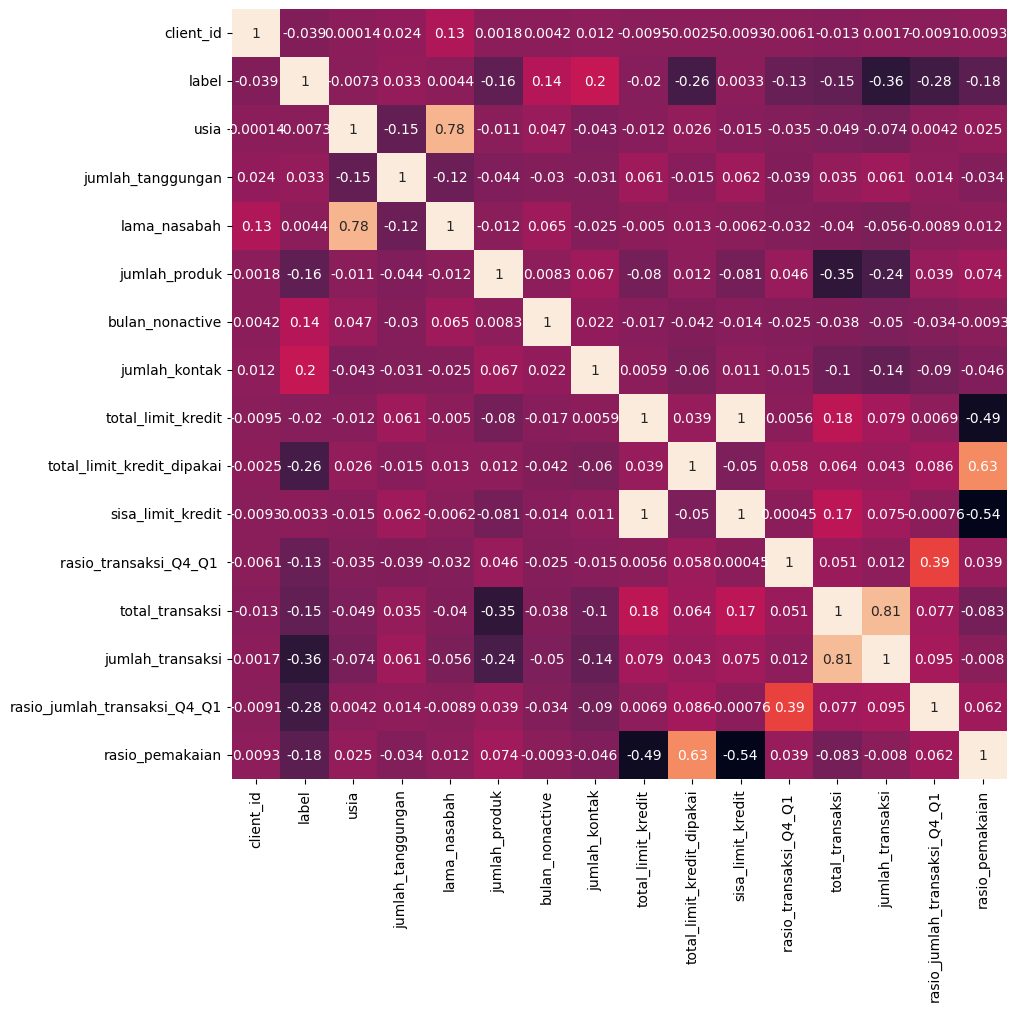

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cbar=False);

#4. Feature Engineering

In [ ]:
# Type Conversion -> Decoding (Numerik - Kategorikal) pada kolom 'usia'
age_binning  = [19,59,100]
age_category = ['dewasa','lansia'] # Pengkategorian usia menurut kemenkes -> https://ayosehat.kemkes.go.id/kategori-usia/dewasa

df['usia'] = pd.cut(df['usia'],bins=age_binning,labels=age_category)
df['usia'] = df['usia'].astype(str)
df['usia'].head(15)

# Reducing Feature (Feature Selection)
df = df.drop(columns=['client_id']) # menghapus kolom client_id karena bernilai unik

#5. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df.label
X = df.drop(columns=['label'])

In [ ]:
# Membagi data training dan data pelatihan
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100, stratify=y) # menggunakan parameter stratify karena terjadi imbalance label

In [ ]:
X_train.isna().sum()

usia                              0
gender                            0
jumlah_tanggungan                 0
pendidikan                      600
status_nikah                    311
penghasilan_tahunan             458
tipe_kartu_kredit                 0
lama_nasabah                      0
jumlah_produk                     0
bulan_nonactive                   0
jumlah_kontak                     0
total_limit_kredit                0
total_limit_kredit_dipakai        0
sisa_limit_kredit                 0
rasio_transaksi_Q4_Q1             0
total_transaksi                   0
jumlah_transaksi                  0
rasio_jumlah_transaksi_Q4_Q1      0
rasio_pemakaian                   0
dtype: int64

In [ ]:
y_train.value_counts()

label
0    3360
1     640
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

label
0    840
1    160
Name: count, dtype: int64

#6. Data Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, PowerTransformer, OrdinalEncoder

##6.1. Numerical Columns

In [ ]:
# kolom untuk fitur numerik
num_columns = ['jumlah_tanggungan', 'lama_nasabah', 'jumlah_produk', 'bulan_nonactive',
       'jumlah_kontak', 'total_limit_kredit', 'total_limit_kredit_dipakai',
       'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ', 'total_transaksi',
       'jumlah_transaksi', 'rasio_jumlah_transaksi_Q4_Q1', 'rasio_pemakaian']

# Pipeline untuk fitur numerik
num_preprocessor = Pipeline([("num_scaler",MinMaxScaler())])

##6.2. Categorical Columns

In [ ]:
# kolom untuk fitur kategorikal
cat_columns = ['gender', 'status_nikah']

# Pipeline untuk fitur kategorikal
cat_preprocessor = Pipeline([("cat_imputer",SimpleImputer(strategy='most_frequent')),
                             ("cat_encoder",OneHotEncoder())])

##6.3. Categorical Columns (Ordinal)

In [ ]:
# kolom untuk fitur kategorikal (ordinal)
cat_ordinal_columns = ['usia', 'pendidikan', 'penghasilan_tahunan', 'tipe_kartu_kredit']

# Mendefinisikan urutan nilai pada kolom pendidikan, penghasilan_tahunan dan tipe_kartu_kredit
age_categories = ['dewasa','lansia']
education_categories = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_categories = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
credit_card_categories = ['Blue', 'Silver', 'Gold', 'Platinum']

# Pipeline untuk fitur kategorikal ordinal
cat_ordinal_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=[age_categories, education_categories, income_categories, credit_card_categories]))
])

In [ ]:
preprocessor = ColumnTransformer([("num_pipeline",num_preprocessor,num_columns),
                                  ("cat_pipeline",cat_preprocessor,cat_columns),
                                  ("cat_ordinal_pipeline",cat_ordinal_preprocessor,cat_ordinal_columns)])
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_scaler',
                                                  MinMaxScaler())]),
                                 ['jumlah_tanggungan', 'lama_nasabah',
                                  'jumlah_produk', 'bulan_nonactive',
                                  'jumlah_kontak', 'total_limit_kredit',
                                  'total_limit_kredit_dipakai',
                                  'sisa_limit_kredit', 'rasio_transaksi_Q4_Q1 ',
                                  'total_transaksi', 'jumlah_transaksi',
                                  'rasio_jumlah_transaksi_Q4_Q1',
                                  'rasio...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['dewasa',
                                                                              'lansia'],
                                                                             ['Uneducated',
                                                                              'High '
                                                                              'School',
                                                                              'College',
                                                                              'Graduate',
                                                                              'Post-Graduate',
                                                                              'Doctorate'],
                                                                             ['Less '
                                                                              'than '
                                                                              '$40K',
                                                                              '$40K '
                                                                              '- '
                                                                              '$60K',
                                                                              '$60K '
                                                                              '- '
                                                                              '$80K',
                                                                              '$80K '
                                                                              '- '
                                                                              '$120K',
                                                                              '$120K '
                                                                              '+'],
                                                                             ['Blue',
                                                                              'Silver',
                                                                              'Gold',
                                                                              'Platinum']]))]),
                                 ['usia', 'pendidikan', 'penghasilan_tahunan',
                                  'tipe_kartu_kredit'])])

In [ ]:
# Menerapkan preprocessing pada training set
X_train_processed = preprocessor.fit_transform(X_train)

# Menerapkan preprocessing pada test set
X_test_processed = preprocessor.transform(X_test)

#7. Balancing Label (Oversampling)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN

In [ ]:
# melihat data yang bernilai kategorikal berada pada indeks keberapa
categorical_indices = list(range(len(num_columns), X_train_processed.shape[1]))
categorical_indices

[13, 14, 15, 16, 17, 18, 19, 20]

In [ ]:
# SMOTENC --> untuk data yang bernilai numerik dan kategorik
oversampler = SMOTENC(categorical_features=[13, 14, 15, 16, 17, 18, 19, 20], sampling_strategy='auto', random_state=42)
X_train_smotenc,y_train_smotenc = oversampler.fit_resample(X_train_processed,y_train)

In [ ]:
y_train.value_counts()

label
0    3360
1     640
Name: count, dtype: int64

In [ ]:
y_train_smotenc.value_counts()

label
0    3360
1    3360
Name: count, dtype: int64

#8. Training Model by Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

##8.1. Training Model SVM

In [ ]:
parameter_grid_SVM = {
    'C': [0.0001,0.001,0.01,0.1,1,10,100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
grid_search_SVM = GridSearchCV(estimator=SVC(),
                           param_grid=parameter_grid_SVM,
                           cv=10,
                           n_jobs=-1)

grid_search_SVM.fit(X_train_smotenc, y_train_smotenc)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [ ]:
print("Best parameters from GridSearchCV:", grid_search_SVM.best_params_)

Best parameters from GridSearchCV: {'C': 100, 'kernel': 'poly'}


##8.2. Training Model Decision Tree

In [ ]:
parameter_grid_DT = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_DT = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=parameter_grid_DT,
                           cv=10,
                           n_jobs=-1)

grid_search_DT.fit(X_train_smotenc, y_train_smotenc)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Best parameters from GridSearchCV:", grid_search_DT.best_params_)

Best parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


##8.3. Training Model RandomForest

In [ ]:
parameter_grid_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_RF = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=parameter_grid_RF,
                           cv=10,
                           n_jobs=-1)

grid_search_RF.fit(X_train_smotenc, y_train_smotenc)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
print("Best parameters from GridSearchCV:", grid_search_RF.best_params_)

Best parameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


#9. Modelling

##9.1. Modelling SVM

In [ ]:
best_model_SVM = grid_search_SVM.best_estimator_
best_model_SVM.fit(X_train_smotenc, y_train_smotenc)

SVC(C=100, kernel='poly')

##9.2. Modelling Decision Tree

In [ ]:
best_model_DT = grid_search_DT.best_estimator_
best_model_DT.fit(X_train_smotenc, y_train_smotenc)

DecisionTreeClassifier(max_depth=10)

##9.3. Modelling Decision Random Forest

In [ ]:
best_model_RF = grid_search_RF.best_estimator_
best_model_RF.fit(X_train_smotenc, y_train_smotenc)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

#10. Model Performance Evaluation

#Update

In [ ]:
from sklearn.metrics import classification_report

def model_performance(model):
    y_train_pred = model.predict(X_train_smotenc)
    y_test_pred = model.predict(X_test_processed)
    print('Model Performance on Data Training')
    print(classification_report(y_train_smotenc, y_train_pred))
    print('Model Performance on Data Testing')
    print(classification_report(y_test, y_test_pred))

##10.1. Performance of SVM model

In [ ]:
model_performance(best_model_SVM)

Model Performance on Data Training
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3360
           1       0.94      0.97      0.95      3360

    accuracy                           0.95      6720
   macro avg       0.95      0.95      0.95      6720
weighted avg       0.95      0.95      0.95      6720

Model Performance on Data Testing
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       840
           1       0.64      0.76      0.69       160

    accuracy                           0.89      1000
   macro avg       0.79      0.84      0.81      1000
weighted avg       0.90      0.89      0.90      1000



##10.2. Performance of Decision Tree model

In [ ]:
model_performance(best_model_DT)

Model Performance on Data Training
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3360
           1       0.98      0.99      0.99      3360

    accuracy                           0.99      6720
   macro avg       0.99      0.99      0.99      6720
weighted avg       0.99      0.99      0.99      6720

Model Performance on Data Testing
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       840
           1       0.73      0.82      0.77       160

    accuracy                           0.92      1000
   macro avg       0.85      0.88      0.86      1000
weighted avg       0.93      0.92      0.92      1000



##10.3. Performance of Random Forest model

In [ ]:
model_performance(best_model_RF)

Model Performance on Data Training
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3360
           1       0.98      0.99      0.99      3360

    accuracy                           0.99      6720
   macro avg       0.99      0.99      0.99      6720
weighted avg       0.99      0.99      0.99      6720

Model Performance on Data Testing
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       840
           1       0.84      0.86      0.85       160

    accuracy                           0.95      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.95      0.95      0.95      1000

